In [1]:
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

#seabornはmatplotlibと同じくグラフを表示するのに使うライブラリです。
#matplotlibより綺麗なグラフを表示できるものが多いですが、反面、引数の指定方法などがmatplotlibと異なるグラフもあるので注意してください。

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  ret

In [2]:
np.random.seed(1)
#seedというのは、乱数種を指定する関数です。乱数種を指定しないと、毎回異なる乱数が生成されます。多くの場合、乱数は欲しいけれども再現性がないのは困ります。
#このseedを設定しておくことで、常に同じ乱数が生成されます。ここれは乱数種を1としましたが、数字であれば何でも自由に決めて構いません。

In [3]:
#次に、平均15、分散1の正規分布に従う乱数を10000個発生させてみましょう。
norm_dist = stats.norm(loc = 15, scale = 1)
data1 = norm_dist.rvs(size = 10000)

In [4]:
#結果を表示します
data1

array([16.62434536, 14.38824359, 14.47182825, ..., 13.98585618,
       14.93730377, 13.56213011])

(array([   2.,   12.,   47.,  104.,  243.,  456.,  779., 1153., 1343.,
        1566., 1455., 1139.,  778.,  470.,  280.,  108.,   41.,   14.,
           7.,    3.]),
 array([11.3435599 , 11.72772436, 12.11188882, 12.49605327, 12.88021773,
        13.26438219, 13.64854664, 14.0327111 , 14.41687556, 14.80104002,
        15.18520447, 15.56936893, 15.95353339, 16.33769784, 16.7218623 ,
        17.10602676, 17.49019122, 17.87435567, 18.25852013, 18.64268459,
        19.02684904]),
 <a list of 20 Patch objects>)

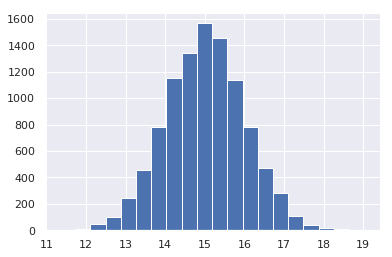

In [6]:
#matplotlibでヒストグラムを作成
#柱の数を指定する場合はbins=で指定
plt.hist(data1, bins = 20)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


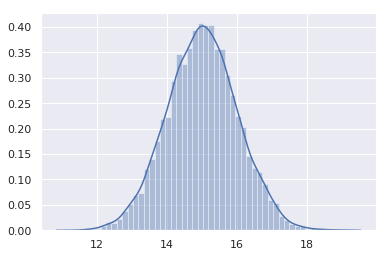

In [7]:
#ヒストグラムに分布を上書きしてみましょう。
sns.distplot(data1)

In [9]:
#母平均の点推定
mu = sp.mean(data1)
mu

15.009772656699104

In [10]:
#母分散の点推定
sigma2 = sp.var(data1, ddof=1)
sigma2

0.9976729288445313

In [11]:
#自由度を計算
df = len(data1)-1
df

9999

In [12]:
#標準誤差を計算
sigma = sp.std(data1, ddof=1)　 #データの個数Nではなく”N-ddof”で割る
se = sigma/sp.sqrt(len(data1))
se

0.00998835786725992

In [13]:
#95%信頼区間を計算
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale = se)
interval

(14.990193464986199, 15.02935184841201)